<a href="https://colab.research.google.com/github/marigflores/ai-studies/blob/main/visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objetivo: reconhecer objetos de uso pessoal
# base de dados "fashion_mnist" com itens de roupas e calçados pré-cadastrados


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(treinamento_imagens, treinamento_rotulos), (teste_imagens, teste_rotulos) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
nomes_classes = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(f'(total de imagens, dimensão 1, dimensão 2)={treinamento_imagens.shape}')
print(f'rótulos={treinamento_rotulos} - São rotulados nas classes 0, 1, 2, 3, ..., 9')
print(f'(total de imagens para teste, dimensão 1, dimensão 2)={teste_imagens.shape}')

(total de imagens, dimensão 1, dimensão 2)=(60000, 28, 28)
rótulos=[9 0 0 ... 3 0 5] - São rotulados nas classes 0, 1, 2, 3, ..., 9
(total de imagens para teste, dimensão 1, dimensão 2)=(10000, 28, 28)


Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255


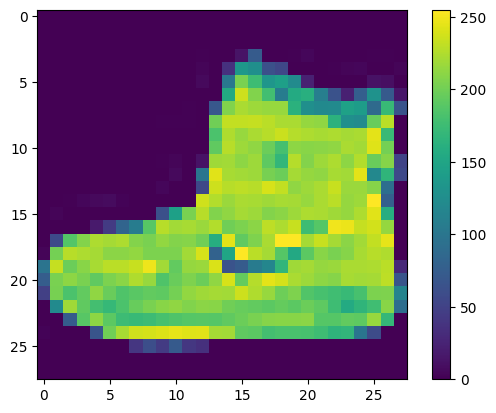

In [ ]:
plt.figure()
plt.imshow(treinamento_imagens[0])
plt.colorbar()
plt.grid(False)
print('Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255')

In [ ]:
treinamento_imagens = treinamento_imagens / 255.0
teste_imagens = teste_imagens / 255.0

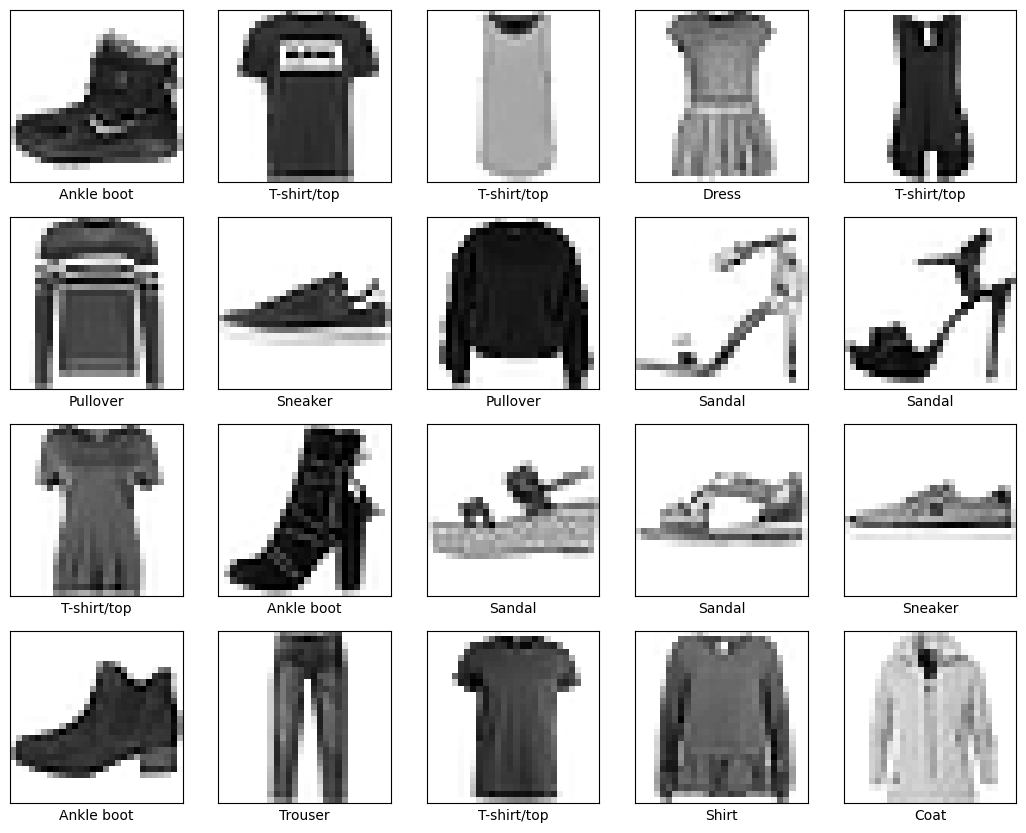

In [ ]:
plt.figure(figsize=(13,13))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(treinamento_imagens[i], cmap=plt.cm.binary)
  plt.xlabel(nomes_classes[treinamento_rotulos[i]])
plt.show()

In [ ]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
modelo.fit(treinamento_imagens,
treinamento_rotulos,
epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7770 - loss: 0.6417
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8647 - loss: 0.3807
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8771 - loss: 0.3369
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8842 - loss: 0.3159
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8917 - loss: 0.2954
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8968 - loss: 0.2785
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9012 - loss: 0.2678
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9071 - loss: 0.2527
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9075 - loss: 0.2448
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9095 - loss: 0.2389
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9150 - loss: 0.2282
Epoch 12/50
1875/1875 ━━━━

In [ ]:
perda_teste, precisao_teste = modelo.evaluate(teste_imagens, teste_rotulos)
print('Precisão dos Testes:', precisao_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.5182
Precisão dos Testes: 0.8842999935150146


In [ ]:
predicoes = modelo.predict(teste_imagens)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
predicoes[0]

array([3.9168328e-16, 8.8564360e-23, 4.2585335e-15, 5.4947340e-27,
       9.5915499e-24, 5.4930005e-10, 7.4790926e-15, 1.8986544e-08,
       5.7851551e-14, 9.9999994e-01], dtype=float32)

In [ ]:
melhor_classificacao=np.argmax(predicoes[0])
print(f'Posição do melhor resultado da primeira imagem de teste: {melhor_classificacao}')

Posição do melhor resultado da primeira imagem de teste: 9


Text(0.5, 1.0, 'Sneaker')

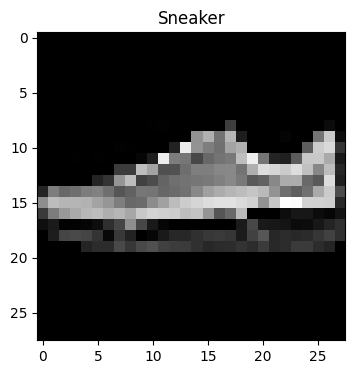

In [ ]:
plt.figure(figsize=(14,4))
plt.imshow(np.reshape(teste_imagens[melhor_classificacao], (28,28)), cmap=plt.cm.gray)
plt.title(nomes_classes[teste_rotulos[melhor_classificacao]])